<a href="https://colab.research.google.com/github/mudrap17/Data-Mining-Assignment/blob/main/Assignment_2_Data_Mining_improvised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data=pd.read_csv('/root/train_data.csv')
data.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [6]:
print(data.shape)

(60115, 4)


In [7]:
data.isnull().sum()

Unnamed: 0         0
Sentence_id        0
New_Sentence    1113
Type               0
dtype: int64

In [8]:
data["Type"].value_counts()

Responsibility    15561
Requirement       14132
SoftSkill          9581
Experience         9248
Skill              6956
Education          4637
Name: Type, dtype: int64

In [9]:
data2=data.dropna()

In [10]:
data2.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [11]:
data2.isnull().sum()

Unnamed: 0      0
Sentence_id     0
New_Sentence    0
Type            0
dtype: int64

In [12]:
print(data2.shape)

(59002, 4)


In [13]:
count_type=data2["Type"].value_counts()
print(count_type)

Responsibility    15257
Requirement       13878
SoftSkill          9416
Experience         9078
Skill              6833
Education          4540
Name: Type, dtype: int64


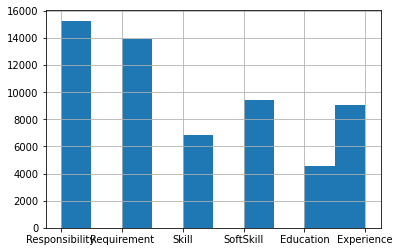

In [14]:
data2["Type"].hist()

In [16]:
vocab={} #no. of times the word occurs in all data
word_count={} #no. of sentences the word occurs in

for index,row in data2.iterrows():
    words=row["New_Sentence"].split(" ")
    flag=dict.fromkeys(words,0)
    for w in words:
        if w not in vocab.keys():
            vocab[w]=1
        else:
            vocab[w]+=1
        if w not in word_count.keys():
            word_count[w]=1
            flag[w]=1
        elif flag[w]==0:
            word_count[w]+=1
            flag[w]=1

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

for key,value in dict(vocab).items():
    if value<=5 or key in stop_words:
        del vocab[key]


print(len(vocab.keys()))
#print(vocab)

8475


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
categories=data2.Type.unique()
from collections import defaultdict
W=np.zeros((len(vocab.keys()),len(categories)))
wc_type=pd.DataFrame(data=W,index=vocab.keys(),columns=categories)

#wc_type=dict.fromkeys(vocab.keys(),{})
#wc_type={}
for index,row in data2.iterrows():
    words=set(row["New_Sentence"].split(" "))
    for w in words:
      if w in wc_type.index:
        wc_type.loc[w][row["Type"]]+=1

print(wc_type)

              Responsibility  Requirement  Skill  SoftSkill  Education  \
and/or                 171.0        176.0  116.0       20.0       95.0   
Review                 136.0          5.0    1.0        3.0        2.0   
technical              747.0        414.0  121.0      186.0      187.0   
documents               72.0         15.0    4.0        4.0        0.0   
ensuring               151.0         10.0    3.0       10.0        0.0   
...                      ...          ...    ...        ...        ...   
contributors             3.0          2.0    0.0        2.0        0.0   
Glide                    0.0          0.0    1.0        0.0        0.0   
Events                   4.0          1.0    0.0        1.0        0.0   
Marine                   3.0          1.0    2.0        0.0        0.0   
ressources               2.0          1.0    0.0        3.0        0.0   

              Experience  
and/or             361.0  
Review               2.0  
technical          313.0  
doc

In [ ]:
laplace_wc_type=wc_type.copy()
#print(laplace_wc_type)

for c in categories:
  wc_type[c]=wc_type[c]/count_type[c]

print(wc_type)

              Responsibility  Requirement  Skill  SoftSkill  Education  \
and/or                 171.0        176.0  116.0       20.0       95.0   
Review                 136.0          5.0    1.0        3.0        2.0   
technical              747.0        414.0  121.0      186.0      187.0   
documents               72.0         15.0    4.0        4.0        0.0   
ensuring               151.0         10.0    3.0       10.0        0.0   
...                      ...          ...    ...        ...        ...   
contributors             3.0          2.0    0.0        2.0        0.0   
Glide                    0.0          0.0    1.0        0.0        0.0   
Events                   4.0          1.0    0.0        1.0        0.0   
Marine                   3.0          1.0    2.0        0.0        0.0   
ressources               2.0          1.0    0.0        3.0        0.0   

              Experience  
and/or             361.0  
Review               2.0  
technical          313.0  
doc

In [ ]:
import math

vocab_size=len(vocab.keys())
def laplace_smoothing(laplace_wc_type,alpha=1):
  for w in vocab.keys():
    for c in categories:
      laplace_wc_type.loc[w][c]=math.log((laplace_wc_type.loc[w][c]+alpha)/(count_type[c]+alpha*vocab_size))

laplace_smoothing(laplace_wc_type)
print(laplace_wc_type)

              Responsibility  Requirement     Skill  SoftSkill  Education  \
and/or             -4.927085    -4.838566 -4.873957  -6.747531  -4.909510   
Review             -5.154599    -8.222956 -8.942984  -8.405759  -8.375246   
technical          -3.457177    -3.986437 -4.832110  -4.560944  -4.237416   
documents          -5.784120    -7.242127 -8.026693  -8.182615  -9.473858   
ensuring           -5.050699    -7.616821 -8.249836  -7.394158  -9.473858   
...                      ...          ...       ...        ...        ...   
contributors       -8.688285    -8.916104 -9.636131  -8.693441  -9.473858   
Glide             -10.074580   -10.014716 -8.942984  -9.792053  -9.473858   
Events             -8.465142    -9.321569 -9.636131  -9.098906  -9.473858   
Marine             -8.688285    -9.321569 -8.537519  -9.792053  -9.473858   
ressources         -8.975967    -9.321569 -9.636131  -8.405759  -9.473858   

              Experience  
and/or         -3.881336  
Review         -8.674

In [ ]:
def laplace_smoothing(count_type, vocab, laplace_wc_type, word, sent_class):
    a = laplace_wc_type[word][sent_class] + 1
    b = count_type[sent_class] + len(vocab)
    return math.log(a/b)

In [ ]:
log_label_priors={}
for c in categories:
  log_label_priors[c]=count_type[c]/len(data2.index)

In [26]:

def predict(count_type, vocab, laplace_wc_type, log_label_priors, categories, test_sentences):
    result = []
    for text in test_sentences:
        label_scores = {c: log_label_priors[c] for c in categories}
        words = set(str(text).split(" "))
        for word in words:
            if word in vocab:
              for c in categories:
                log_w_given_c = laplace_wc_type.loc[word][c]
                label_scores[c] += log_w_given_c
        result.append(max(label_scores, key=label_scores.get))
    return result

In [ ]:
from collections import Counter
def top10():
  top10=dict.fromkeys(categories,[])
  options=dict.fromkeys(vocab.keys())
  for c in categories:
    for word in vocab:
      log_c_given_w=wc_type.loc[word][c]*(count_type[c]/len(data2.index))/word_count[word]
      options[word]=log_c_given_w
    top10[c]=list(dict(Counter(options).most_common(10)).keys())
  return top10

In [ ]:
top10()

{'Responsibility': ['contracted',
  'Represents',
  'backlog.',
  'assets.',
  'Determine',
  'Interacts',
  'counterparts',
  'Ensures',
  'shows,',
  'conferences,'],
 'Requirement': ['Approximately',
  '50',
  'Citizens',
  'resident,',
  'License.',
  '10%.',
  'visa',
  'Q',
  'Valid',
  'citizenship'],
 'Skill': ['PowerShell.',
  '(Oracle,',
  '(SQL,',
  'Splunk,',
  'PowerPoint).',
  'P8',
  'Glide',
  'Ethernet,',
  'Excel.',
  '8,'],
 'SoftSkill': ['Ambitious,',
  'C1',
  'spoken)',
  'accurately,',
  'Positive,',
  'Flexibilitxe4t',
  'Innovative,',
  'thinker,',
  'ethic.',
  'habilidades'],
 'Education': ['Science/Engineering',
  'Post-Secondary',
  'Engineering/',
  '(Masters',
  '(Mechanical,',
  'technical/professional',
  'majors',
  'Computer,',
  '(Science,',
  'Psychology,'],
 'Experience': ['4-6',
  'Three',
  '2-5',
  '+5',
  '8+',
  'ans',
  'analyst/consultant',
  'HAVE5+',
  'years+',
  'Over']}

In [18]:
from sklearn.model_selection import train_test_split

X=data2["New_Sentence"]
y=data2["Type"]
train_sentences, test_sentences, train_labels, test_labels = train_test_split(X, y, test_size=0.3, shuffle=True)
dev_sentences, test_sentences, dev_labels, test_labels = train_test_split(test_sentences, test_labels, test_size=0.5, shuffle=True)

In [23]:
def fit(data,labels,laplace=True,alpha=1):
  import math

  count_type=labels.value_counts()
  vocab={} #no. of times the word occurs in all data
  word_count={} #no. of sentences the word occurs in

  for row in data:
    words=row.split(" ")
    flag=dict.fromkeys(words,0)
    for w in words:
        if w not in vocab.keys():
            vocab[w]=1
        else:
            vocab[w]+=1
        if w not in word_count.keys():
            word_count[w]=1
            flag[w]=1
        elif flag[w]==0:
            word_count[w]+=1
            flag[w]=1

  #remove rare words and stop words
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))

  for key,value in dict(vocab).items():
    if value<=5 or key in stop_words:
        del vocab[key]

  vocab_size=len(vocab.keys())

  #count the number of sentences of a particular category containing a given word - wc_type
  categories=labels.unique()
  from collections import defaultdict
  W=np.zeros((len(vocab.keys()),len(categories)))
  wc_type=pd.DataFrame(data=W,index=vocab.keys(),columns=categories)
  for row in range(len(data)):
    words=set(data.iloc[row].split(" "))
    for w in words:
      if w in wc_type.index:
        wc_type.loc[w][labels.iloc[row]]+=1
  
  laplace_wc_type=wc_type.copy()
 
   #calculate the conditional probabilities P[w|category]
  for c in categories:
     wc_type[c]=wc_type[c]/count_type[c]

  # Laplace smoothing
  if laplace:
     for w in vocab.keys():
      for c in categories:
        laplace_wc_type.loc[w][c]=math.log((laplace_wc_type.loc[w][c]+alpha)/(count_type[c]+alpha*vocab_size))
  
  log_label_priors={}
  for c in categories:
     log_label_priors[c]=count_type[c]/len(data)
  
  return count_type, vocab, laplace_wc_type, log_label_priors, categories, wc_type

In [24]:
count_type, vocab, laplace_wc_type, log_label_priors, categories,wc_type=fit(train_sentences,train_labels,laplace=True,alpha=500)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
pred_dev2=predict(count_type, vocab, laplace_wc_type, log_label_priors, categories, dev_sentences)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(dev_labels,pred_dev2)

0.583954802259887

In [30]:
accuracy=[]
alphas=[0.1,0.5,1,5]
for i in range(len(alphas)):
  count_type, vocab, laplace_wc_type, log_label_priors, categories,wc_type=fit(train_sentences,train_labels,laplace=True,alpha=alphas[i])
  pred_dev2=predict(count_type, vocab, laplace_wc_type, log_label_priors, categories, dev_sentences)
  accuracy.append(accuracy_score(dev_labels,pred_dev2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


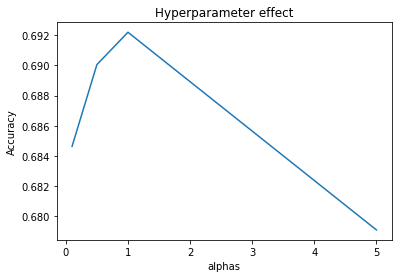

In [31]:
plt.plot(alphas, accuracy)

plt.xlabel('alphas')
plt.ylabel('Accuracy')
  

plt.title('Hyperparameter effect')
  

plt.show()

In [32]:
count_type, vocab, laplace_wc_type, log_label_priors, categories,wc_type=fit(train_sentences,train_labels,laplace=True,alpha=1)
pred_dev3=predict(count_type, vocab, laplace_wc_type, log_label_priors, categories, test_sentences)
accuracy_score(test_labels,pred_dev3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0.7011637103152186